In [127]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [128]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [129]:
import pandas as pd
from nltk.stem import *
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from nltk.tokenize import WhitespaceTokenizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import time
import sklearn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, cohen_kappa_score
import pickle

In [130]:
df = pd.read_excel('iphproductdata.xlsx')
df.head()

,Country Code,IPH Category,IPH Sub Category,Product,Product Description,Product Code,Gross Sales USD
0,AT,Health Care,Wound Care,Hansaplast Strips Water-Resistant 40St,Hansaplast Strips Sort 1St,100763,12574.2775
1,AT,Health Care,Other Health Care,Bis 30.06.21 bitte 115664 nutzen! - EWMasken50...,Einwegmasken 31g 50er Pg 1St,115325,1298.4651
2,AT,Health Care,Other Health Care,Einwegmasken 3lg 50er Pg 1St,Disposable masks 3lg 50s Pg 1st,115664,1430.3671
3,AT,Health Care,Other Health Care,FFP2 Maske (Ts) 1St,FFP2 Mask (Ts) 1St,115559,146271.2913
4,AT,Health Care,Other Health Care,Gesichtsmaske Mund-Nasen-Schutz 1St,Shell Face Mask 1st,116404,4.0584


In [131]:
df.isna().sum()

Country Code           0
IPH Category           0
IPH Sub Category       0
Product                0
Product Description    0
Product Code           0
Gross Sales USD        0
dtype: int64

In [132]:
df = df.drop(index=df[df.duplicated(['Product Description'])].index) 

In [133]:
df['Final_Category'] = df['IPH Category'].str.cat(df[['IPH Sub Category']].values,sep=' - ')

In [134]:
df['Final_Category'].head()

0           Health Care - Wound Care
1    Health Care - Other Health Care
2    Health Care - Other Health Care
3    Health Care - Other Health Care
4    Health Care - Other Health Care
Name: Final_Category, dtype: object

In [135]:
df['Final_Category'].nunique()

20

In [136]:
final_categories_counts = df['Final_Category'].value_counts().sort_values(ascending=True)

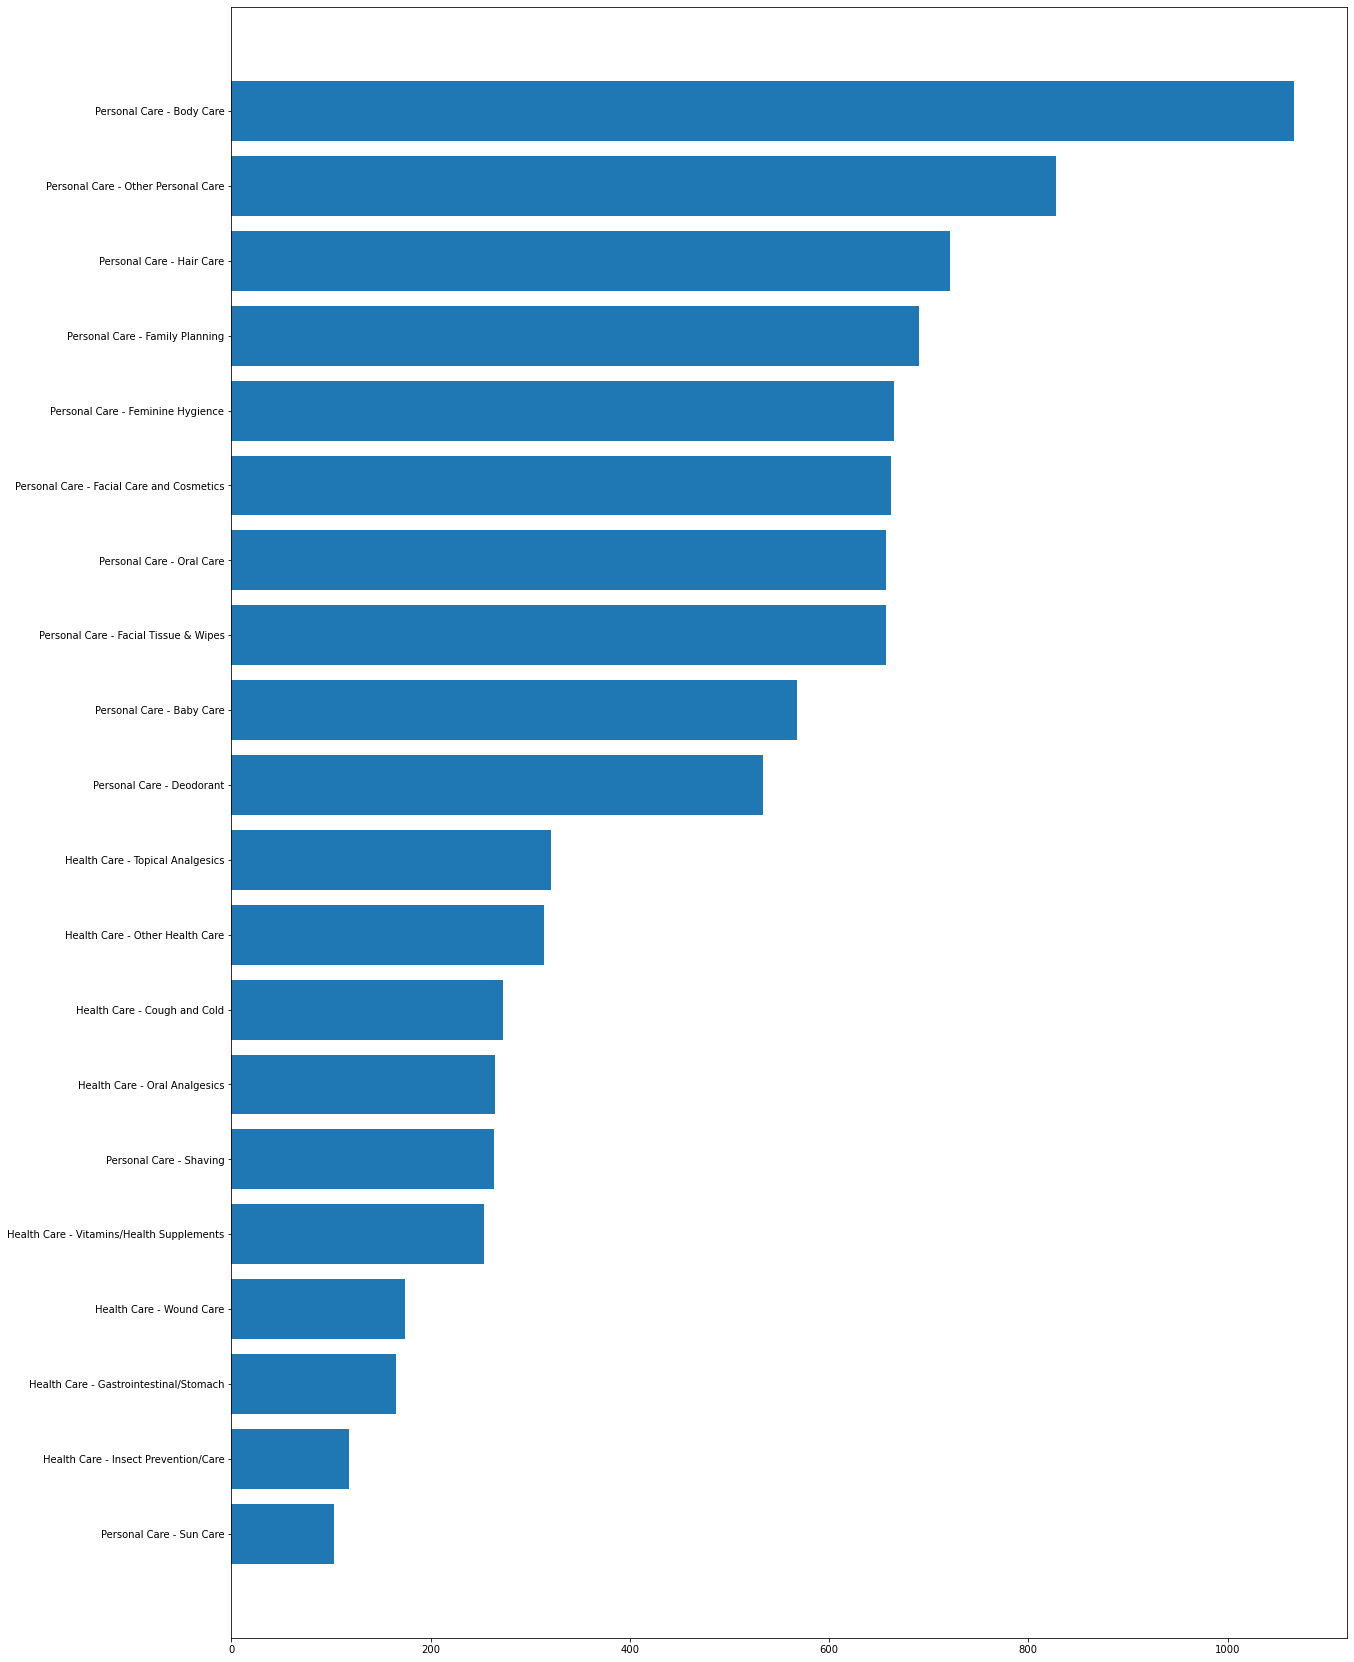

In [137]:
plt.figure(figsize=(20,30))
plt.barh(final_categories_counts.index, final_categories_counts)
plt.xlabel=None

In [138]:
final_categories_counts.head(30)

Personal Care - Sun Care                      103
Health Care - Insect Prevention/Care          118
Health Care - Gastrointestinal/Stomach        165
Health Care - Wound Care                      174
Health Care - Vitamins/Health Supplements     254
Personal Care - Shaving                       264
Health Care - Oral Analgesics                 265
Health Care - Cough and Cold                  273
Health Care - Other Health Care               314
Health Care - Topical Analgesics              321
Personal Care - Deodorant                     534
Personal Care - Baby Care                     568
Personal Care - Facial Tissue & Wipes         657
Personal Care - Oral Care                     657
Personal Care - Facial Care and Cosmetics     662
Personal Care - Feminine Hygience             665
Personal Care - Family Planning               690
Personal Care - Hair Care                     721
Personal Care - Other Personal Care           828
Personal Care - Body Care                    1067


In [139]:
small_count_categories = final_categories_counts[final_categories_counts<=5].index

In [140]:
len(small_count_categories)

0

In [141]:
df['Final_Category'].replace(to_replace=small_count_categories, value='Other', inplace=True)

In [142]:
df['codes'] = df['Final_Category'].astype('category').cat.codes
df['codes'].nunique()

20

In [143]:
code_dictionary = dict(set(list(zip(df['codes'], df['Final_Category']))))

In [144]:
X = df['Product Description']
y = df['codes']

In [145]:
tokenizer = WhitespaceTokenizer()

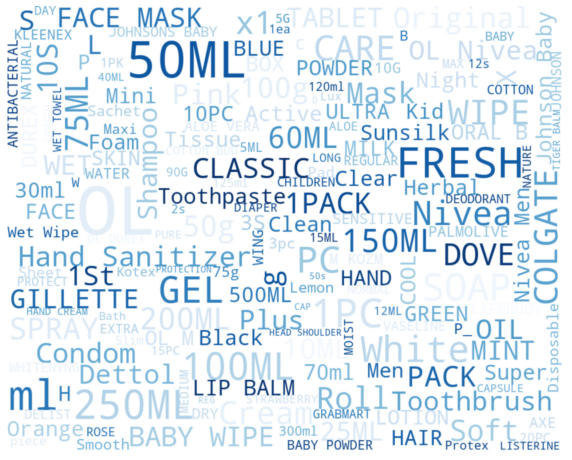

In [146]:
from wordcloud import WordCloud
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 183,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(X_train))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [147]:
def plot_most_common_features(text_col, target_col, n_features=50):
    from matplotlib import interactive

    df = pd.DataFrame({"text": text_col, "CLASS": target_col})
    grouped = df.groupby(["CLASS"]).apply(lambda x: x["text"].sum())
    grouped_df = pd.DataFrame({"CLASS": grouped.index, "text": grouped.values})

    from nltk.tokenize import WhitespaceTokenizer
    tokenizer = WhitespaceTokenizer()

    for ii, text in enumerate(grouped_df.text):
        pd.DataFrame(tokenizer.tokenize(text)).apply(pd.value_counts).head(n_features).plot(kind="bar", cmap=plt.cm.seismic, figsize=(20,5))
        plt.title(grouped_df.CLASS[ii], fontsize=20)
        plt.xticks(fontsize=15)
        plt.legend([])
        interactive(True)
        plt.show()

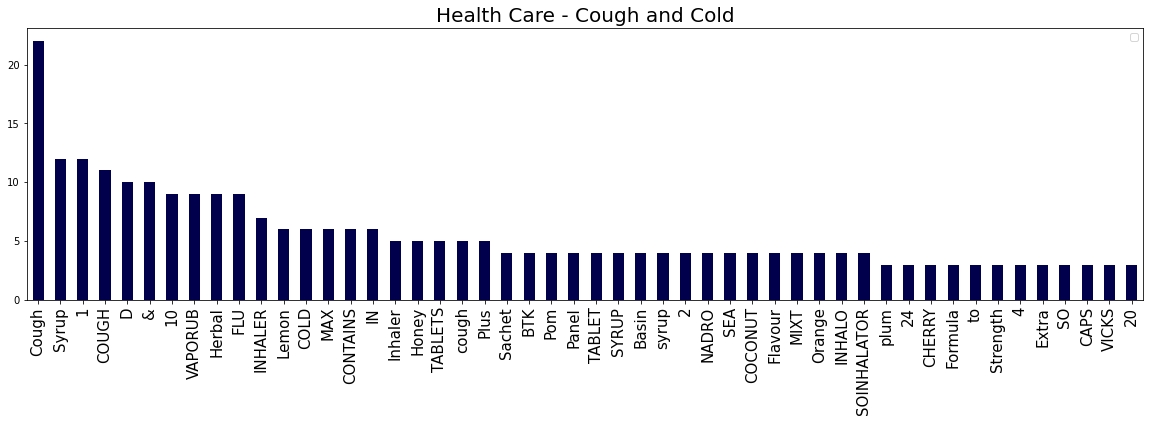

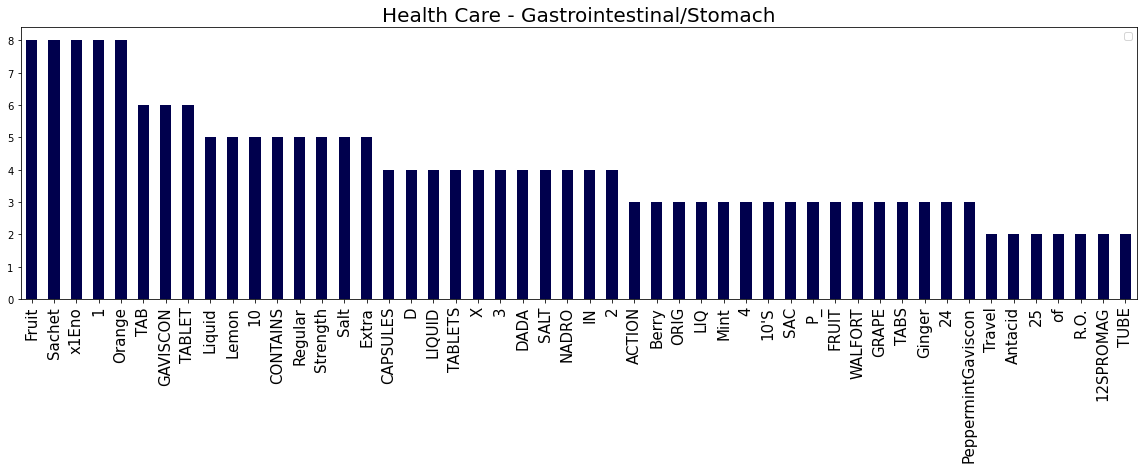

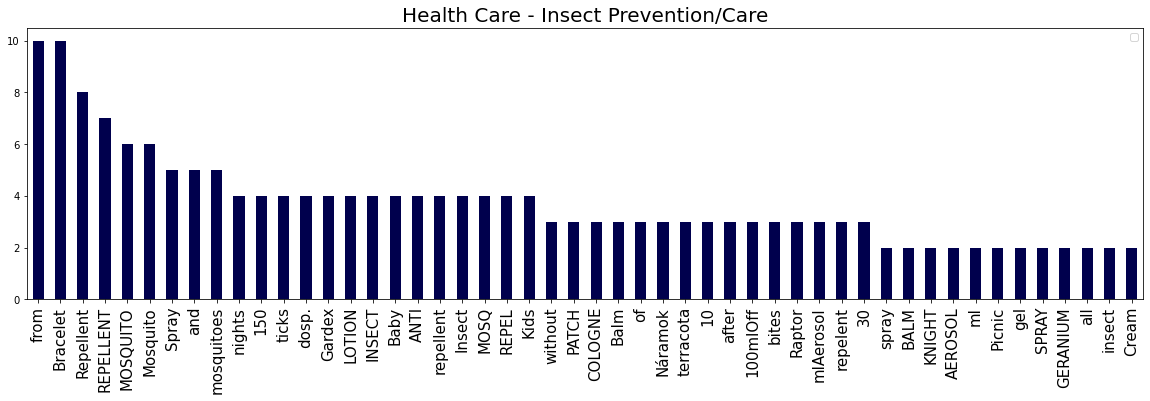

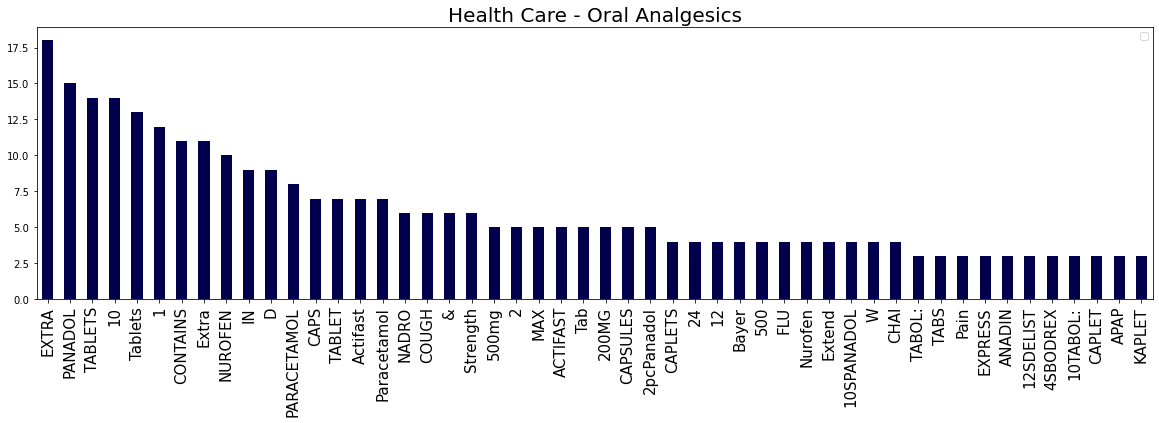

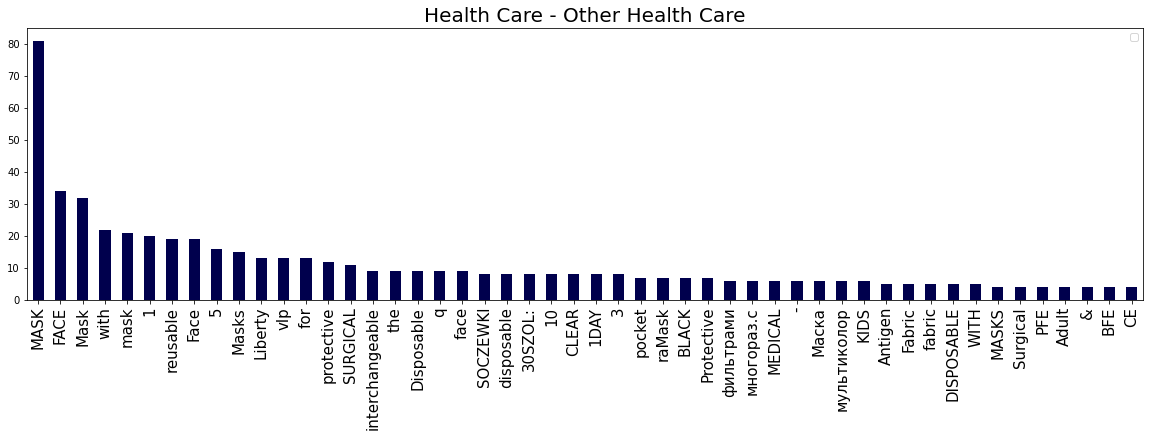

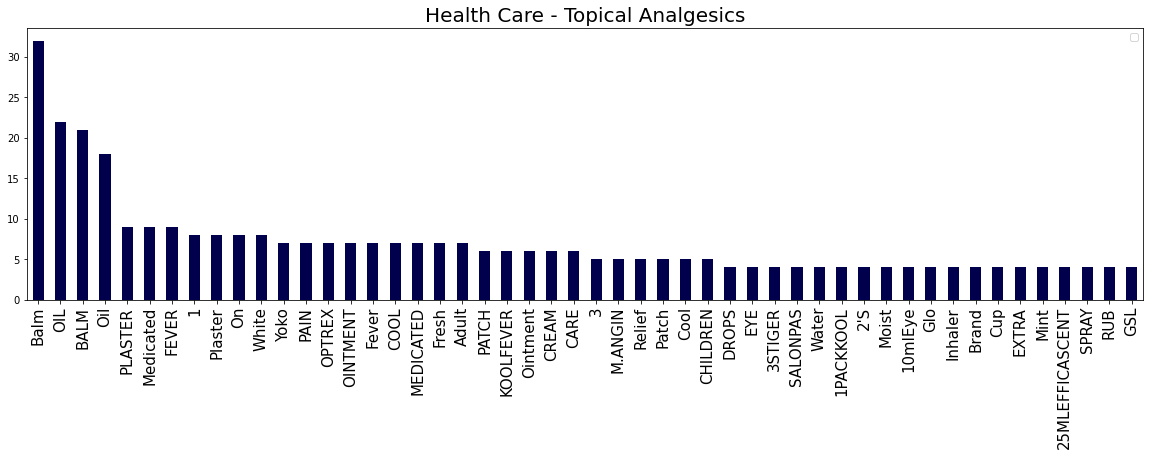

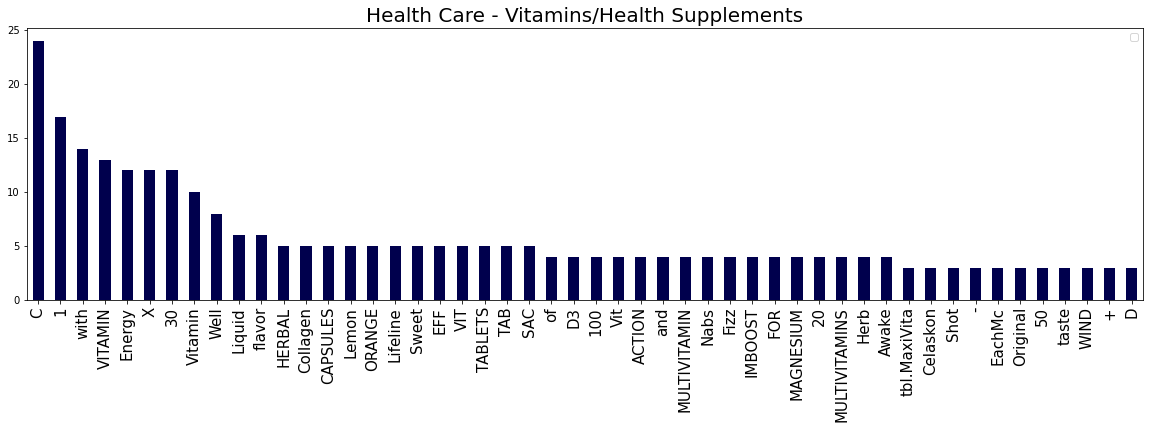

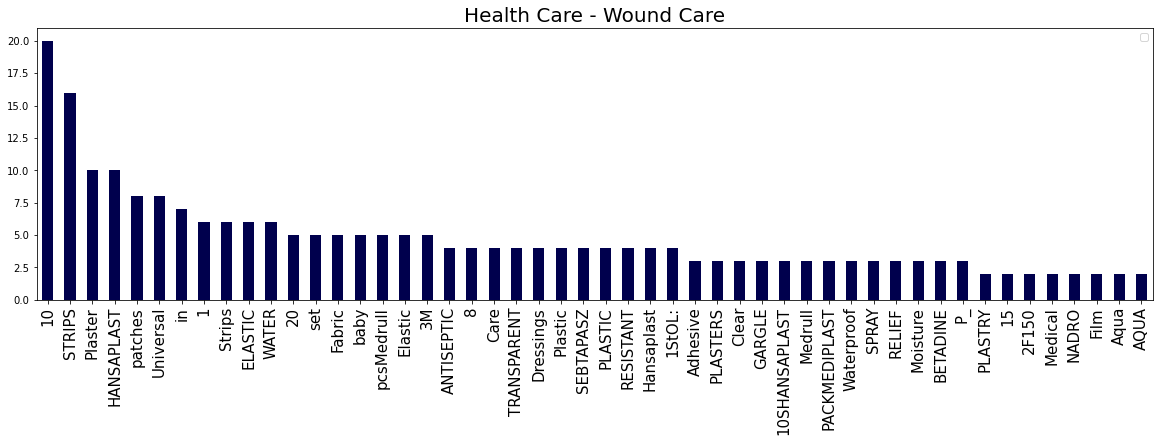

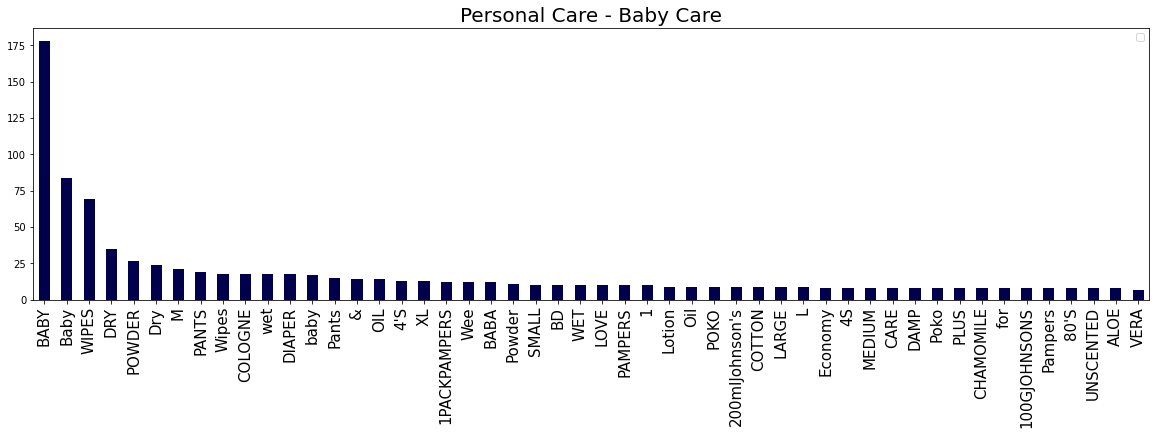

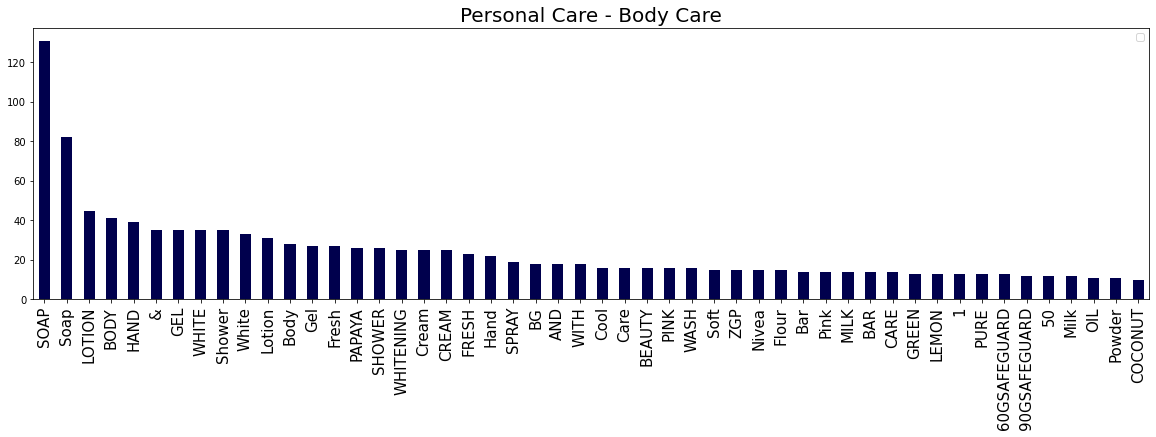

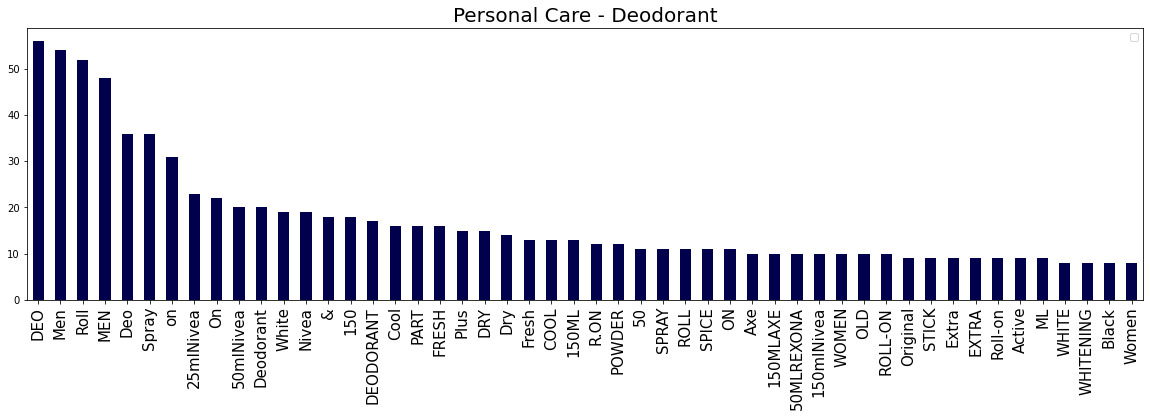

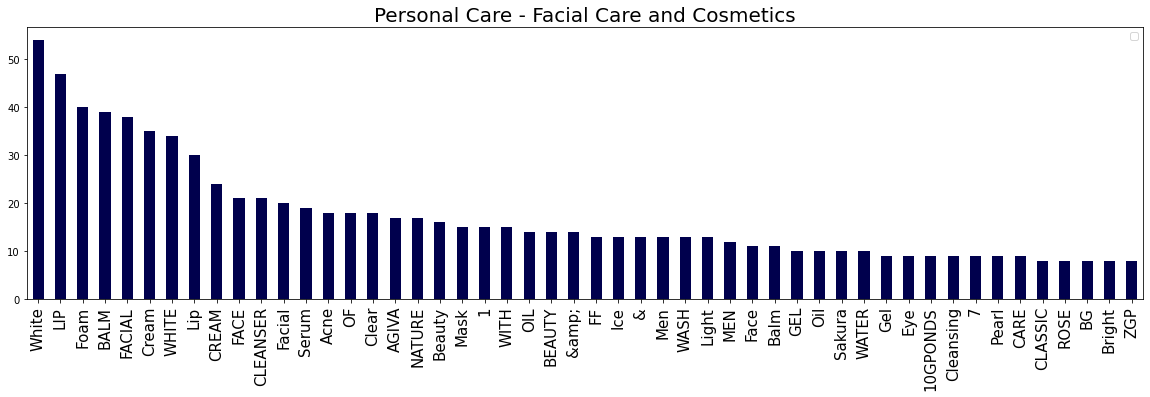

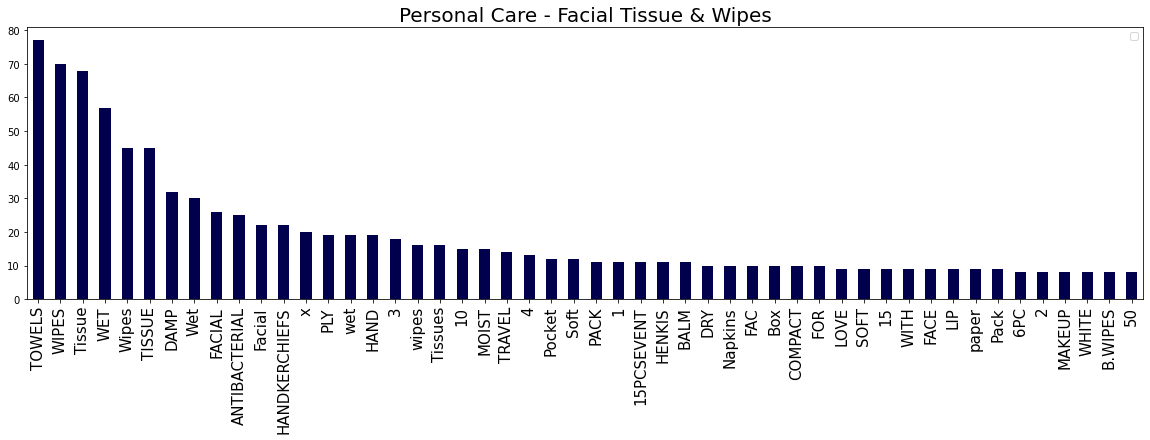

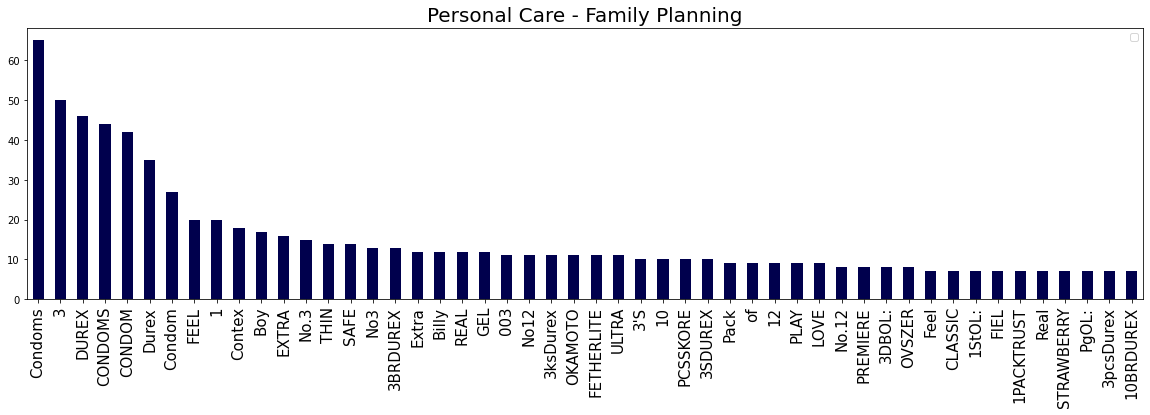

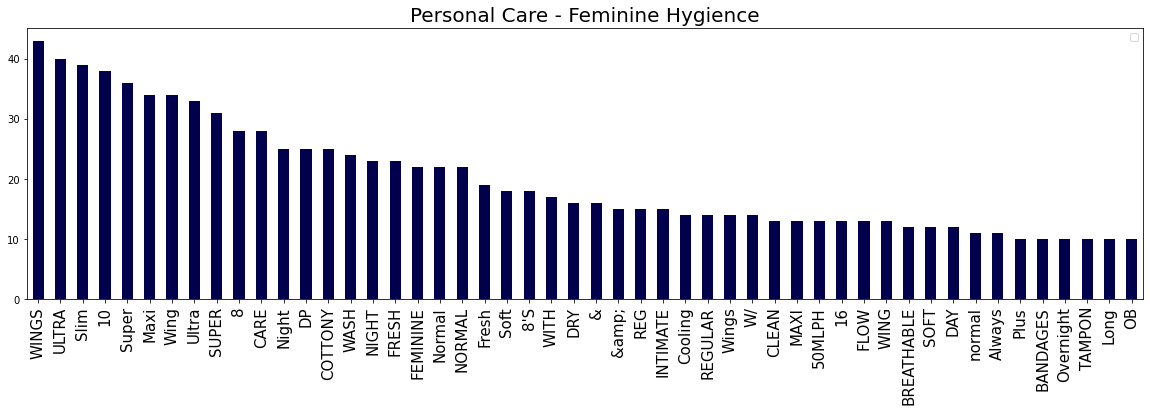

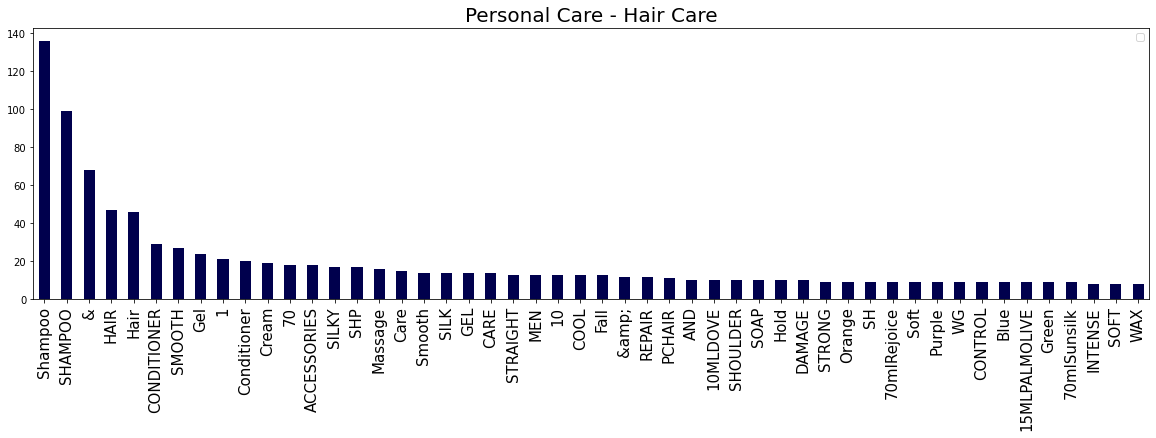

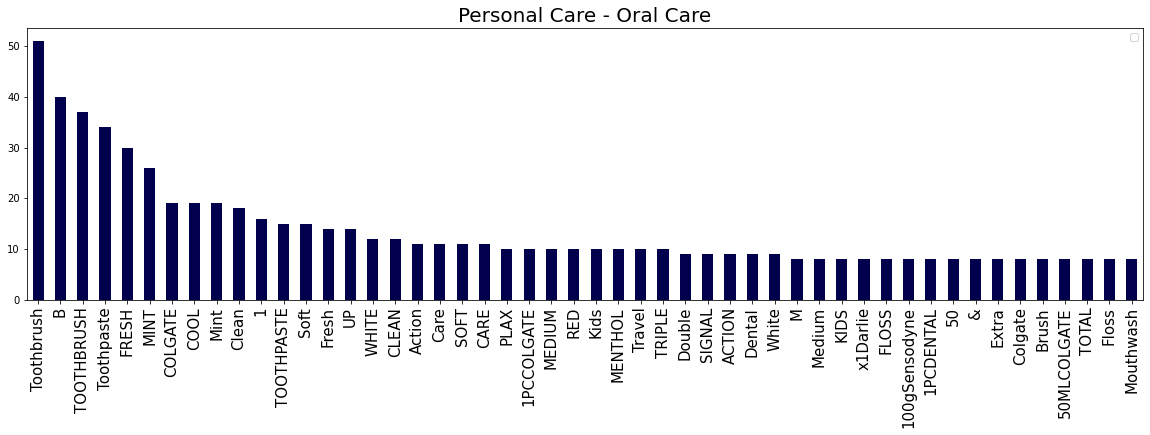

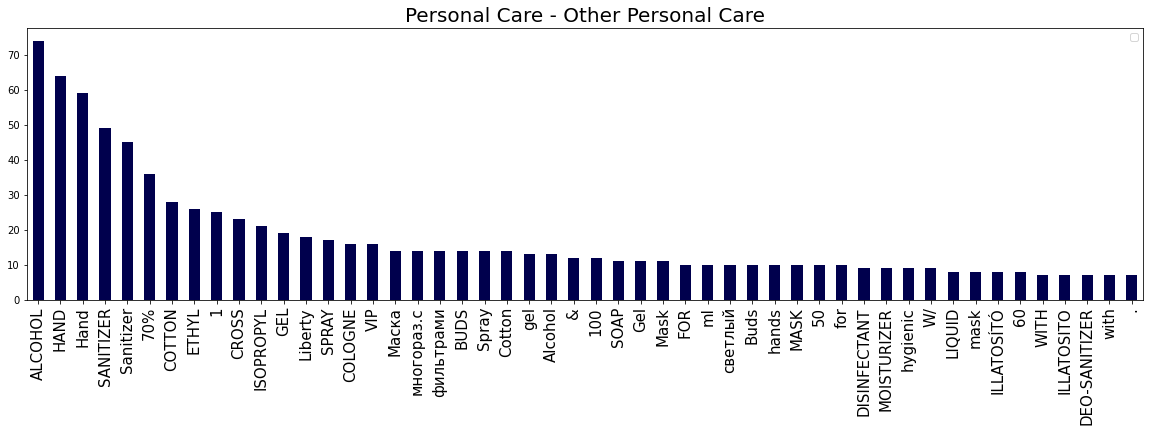

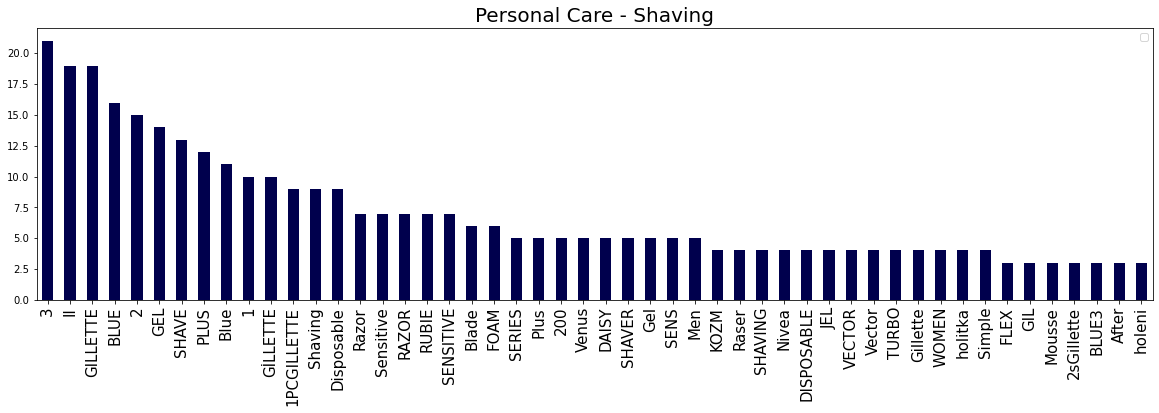

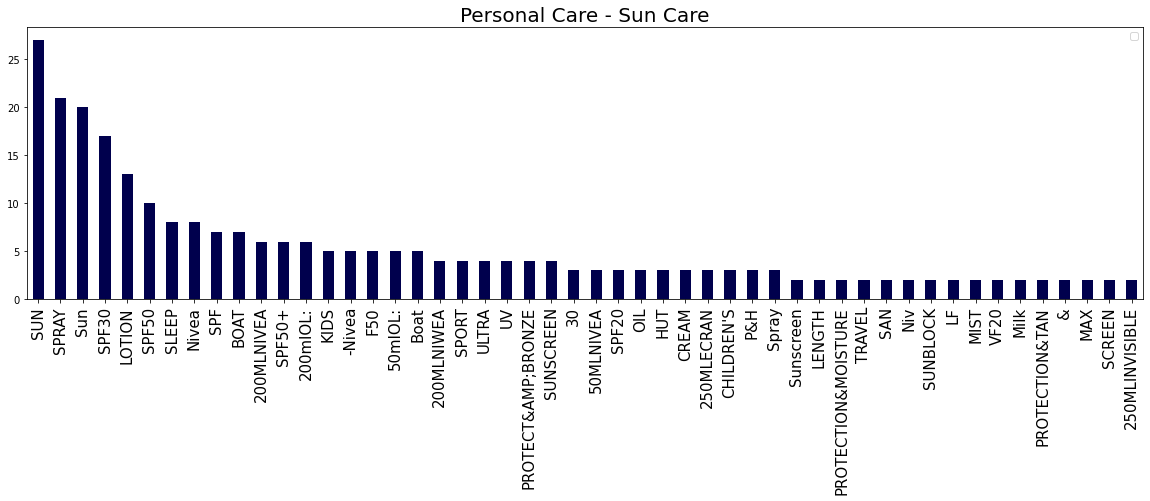

In [148]:
plot_most_common_features(X,df['Final_Category'])

In [149]:
nltk.download('stopwords')

from nltk.stem import SnowballStemmer


def process_text(raw_text):

    letters_only = re.sub("[^a-zA-Z]", " ",raw_text)
    no_one_letter = re.sub(r"\b[a-zA-Z]\b","",letters_only)
    words = no_one_letter.lower().split()
    
    stops = set(stopwords.words("spanish")) 
    not_stop_words = [w for w in words if not w in stops]

    final_words = [word for word in not_stop_words]
    
    return( " ".join( final_words ))  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S.Subramanian2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
nltk.download('stopwords')

from nltk.stem import SnowballStemmer


def stemming(raw_text):
    
    stemmer = SnowballStemmer('spanish')
    stemmed = [stemmer.stem(word) for word in raw_text]
    
    return("".join(stemmed))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S.Subramanian2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
X_cleaner = X.apply(lambda x: process_text(x))

In [152]:
X_cleaner_2 = X_cleaner.apply(lambda x: stemming(x))

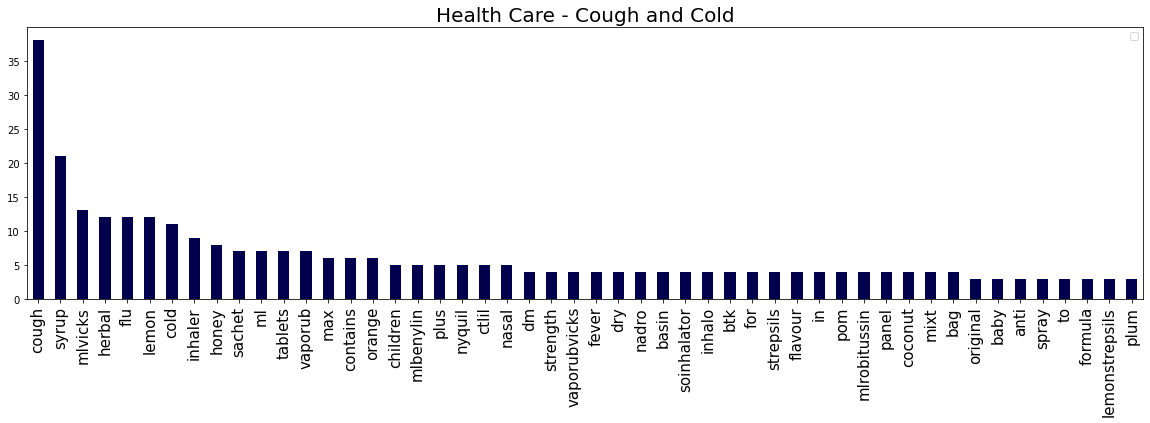

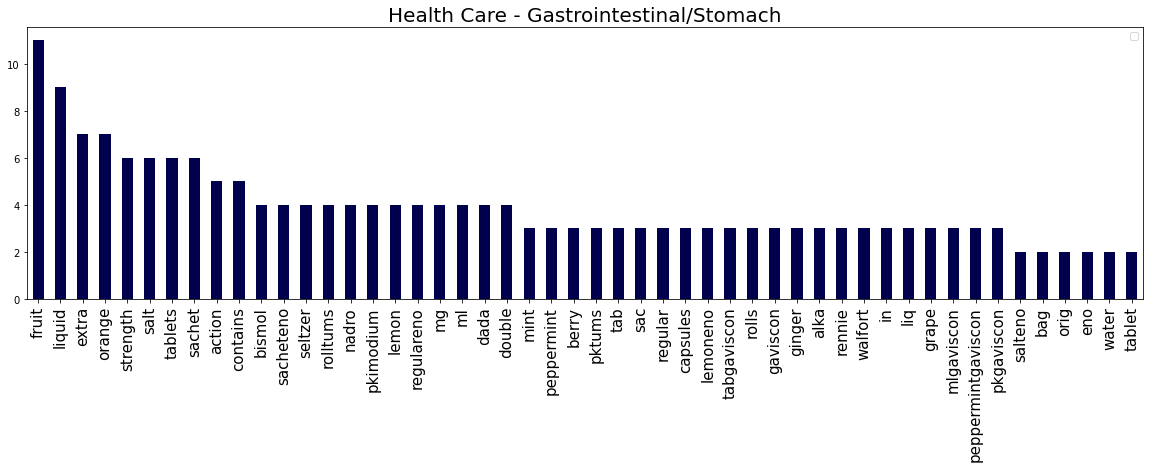

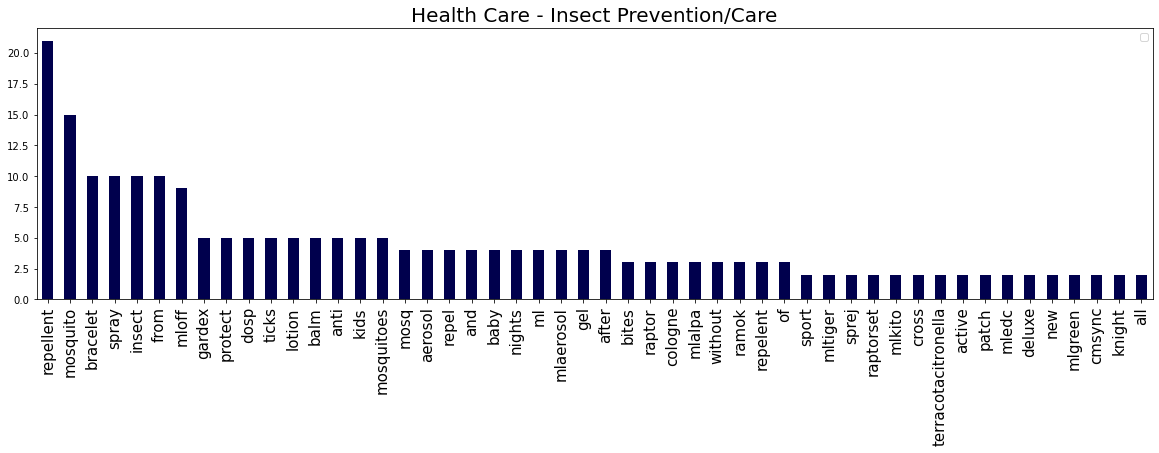

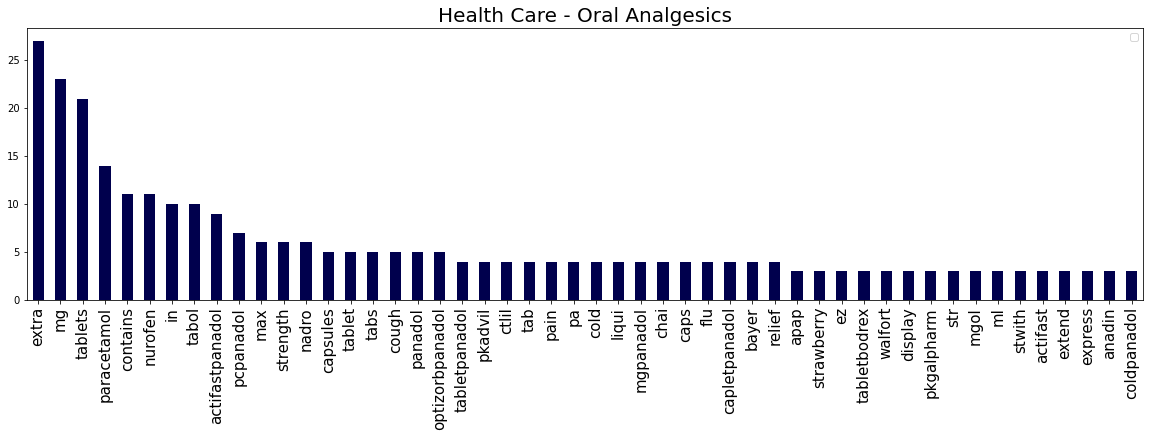

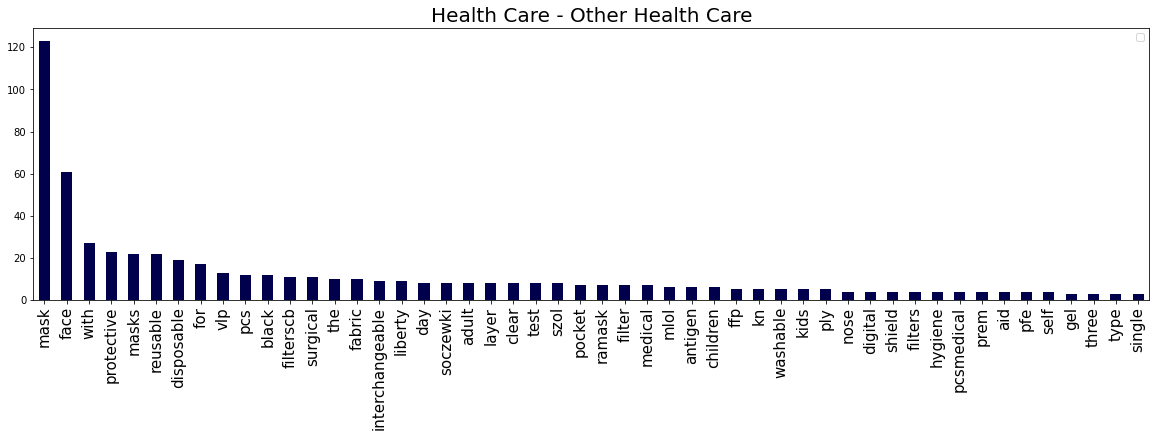

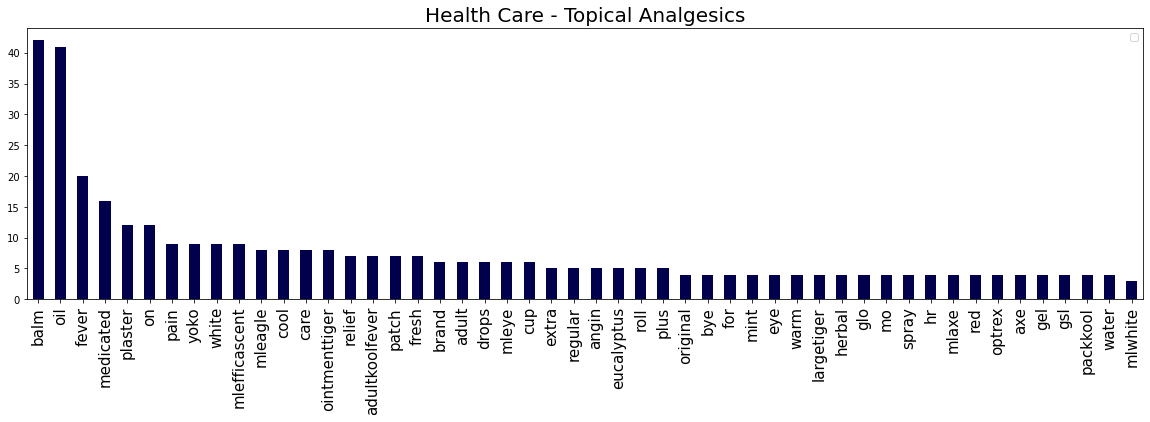

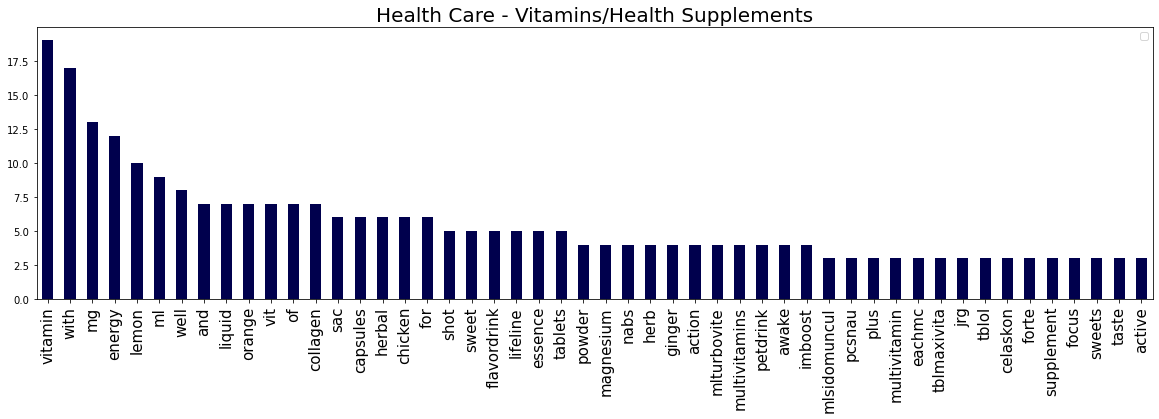

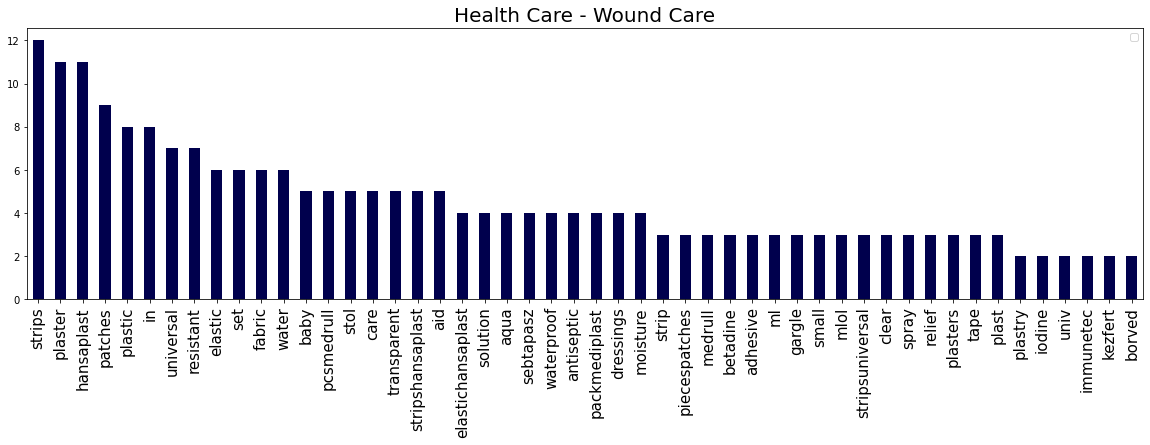

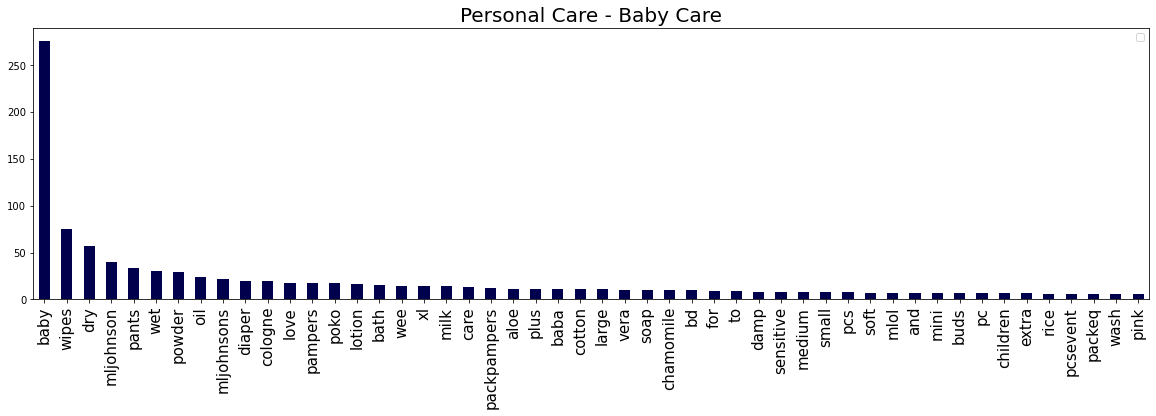

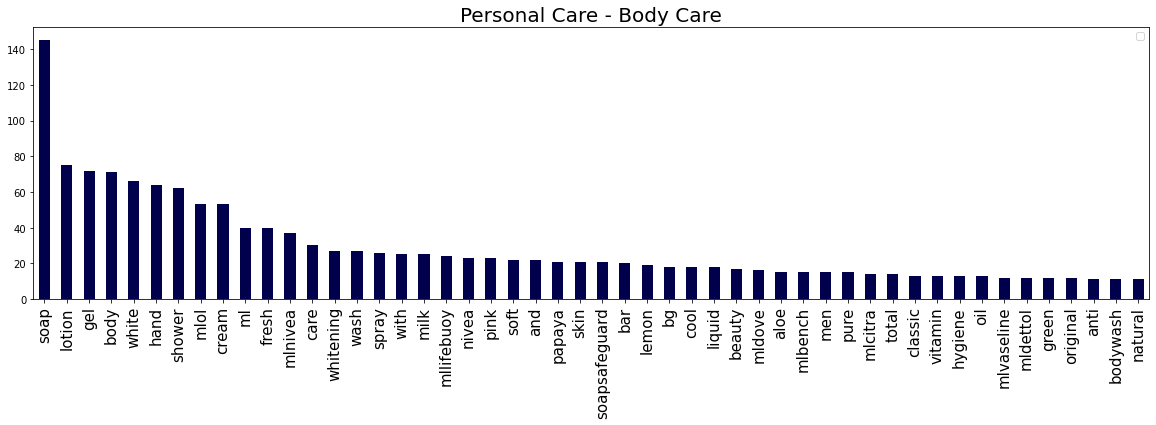

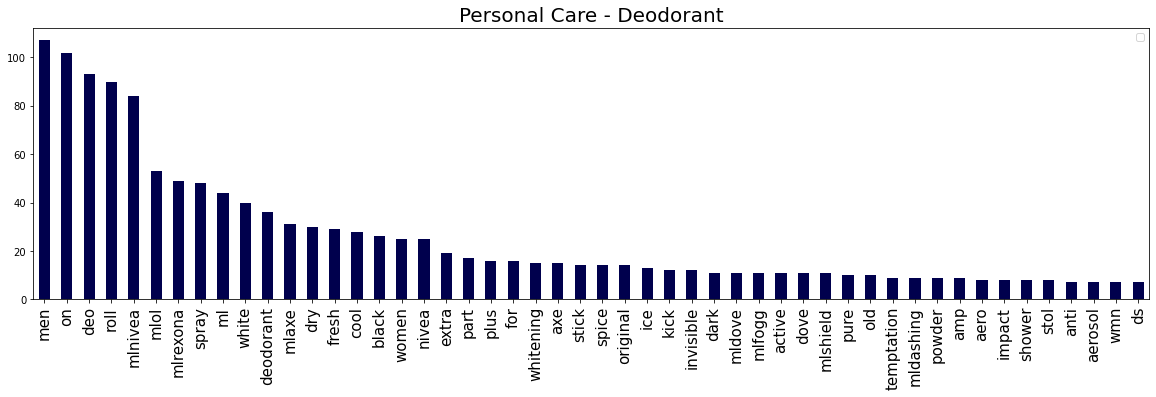

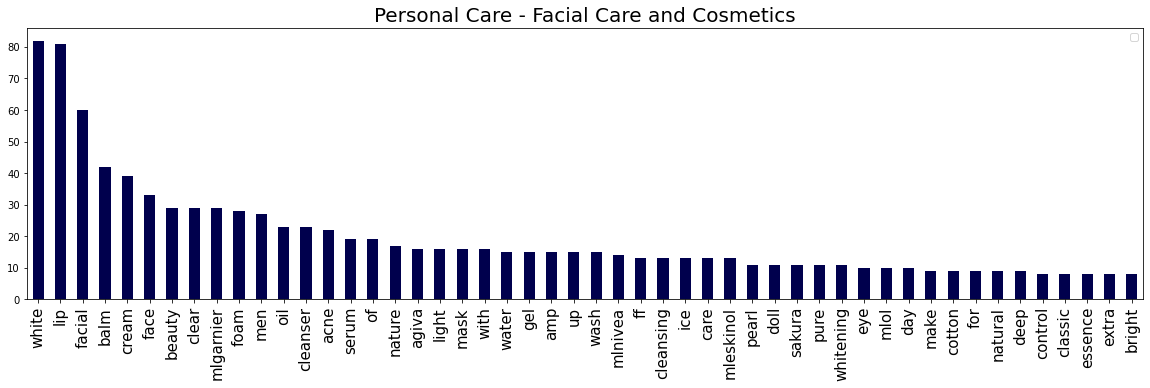

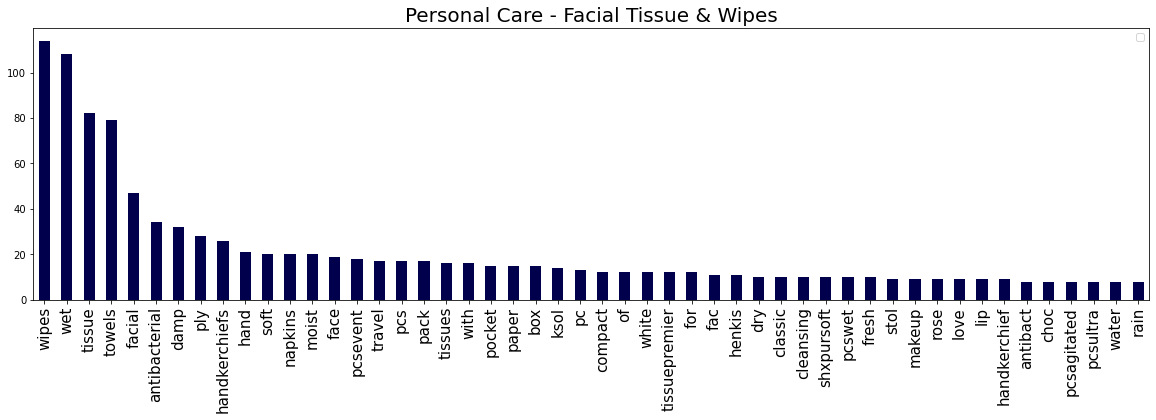

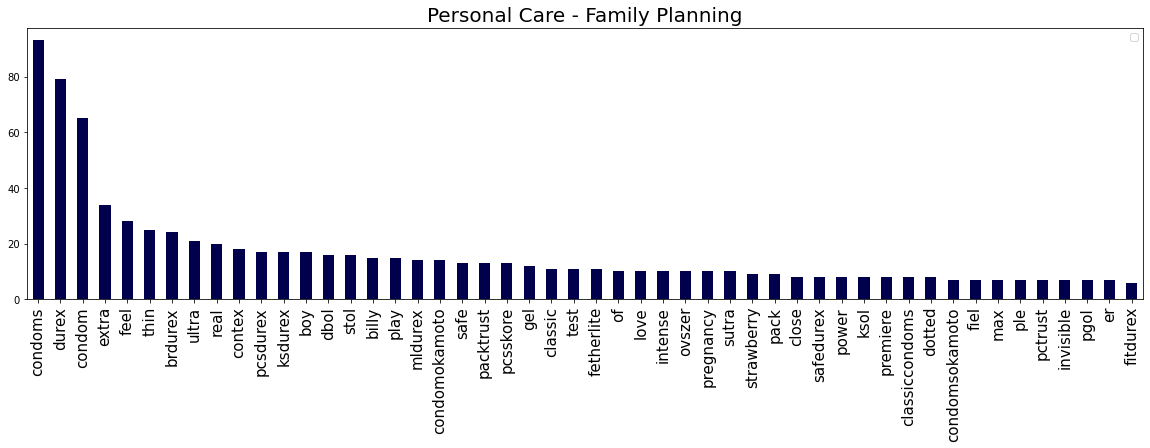

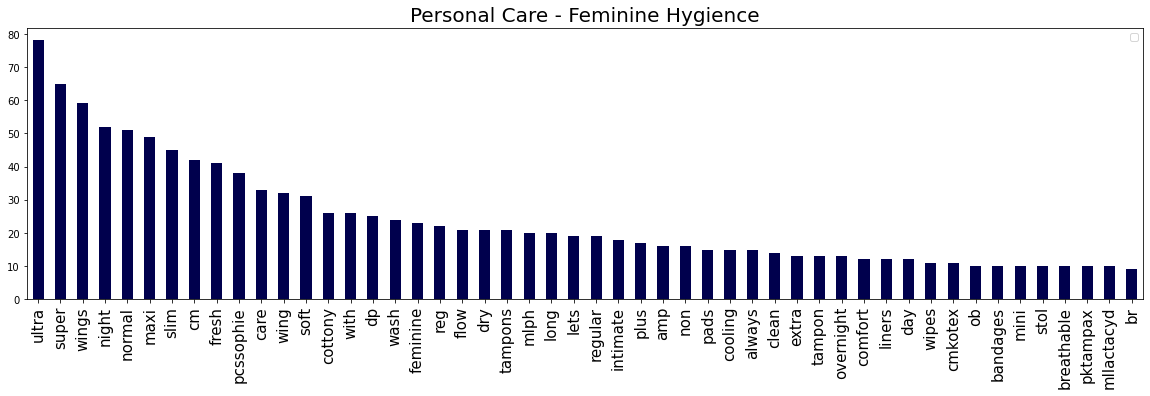

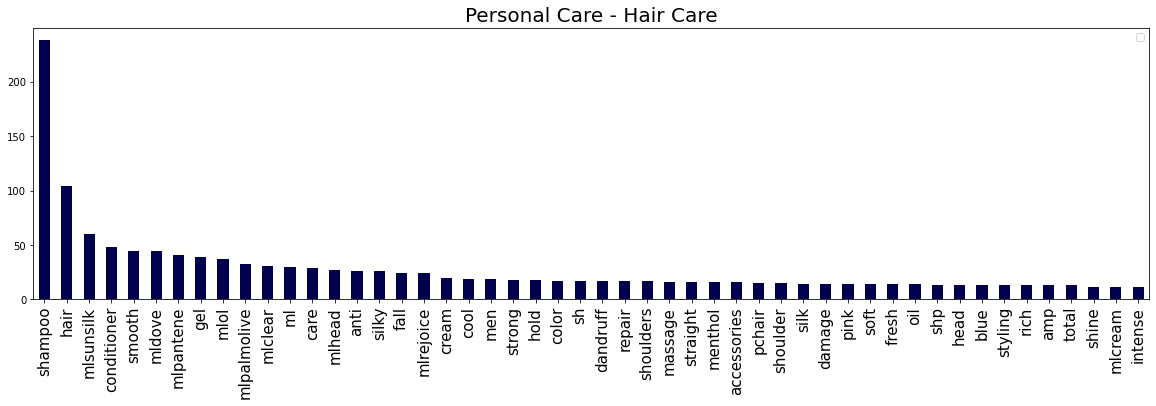

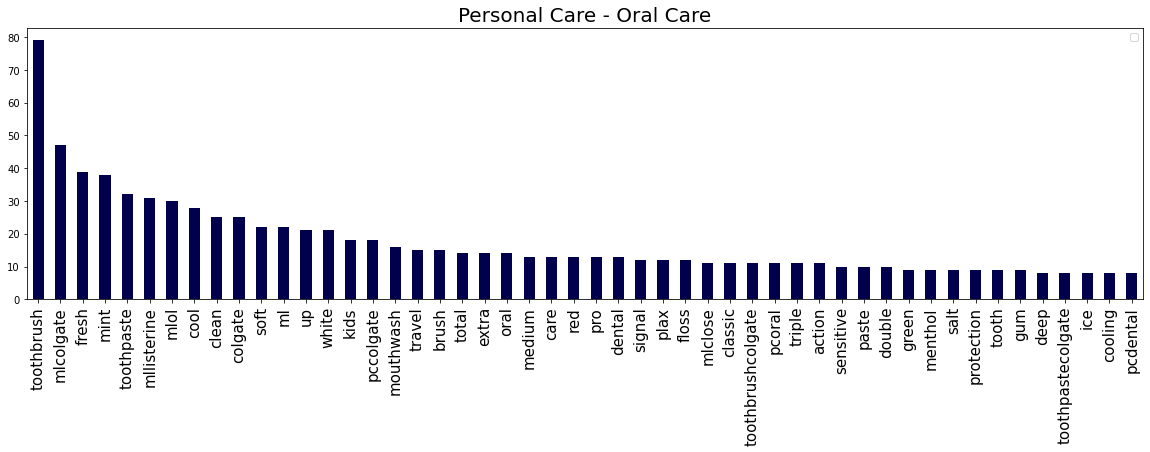

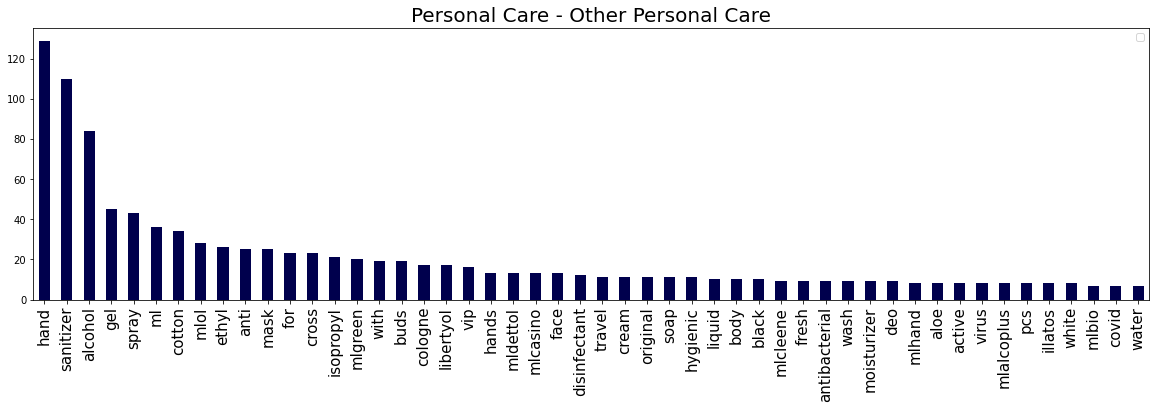

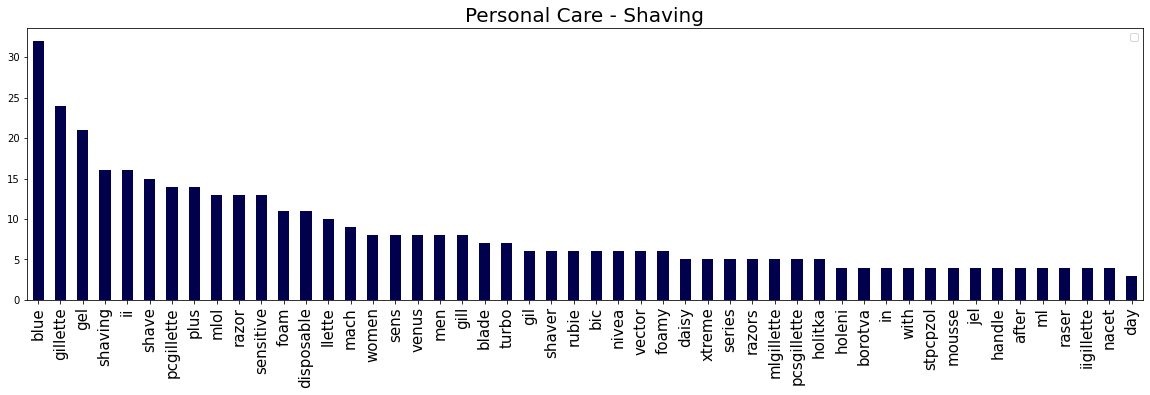

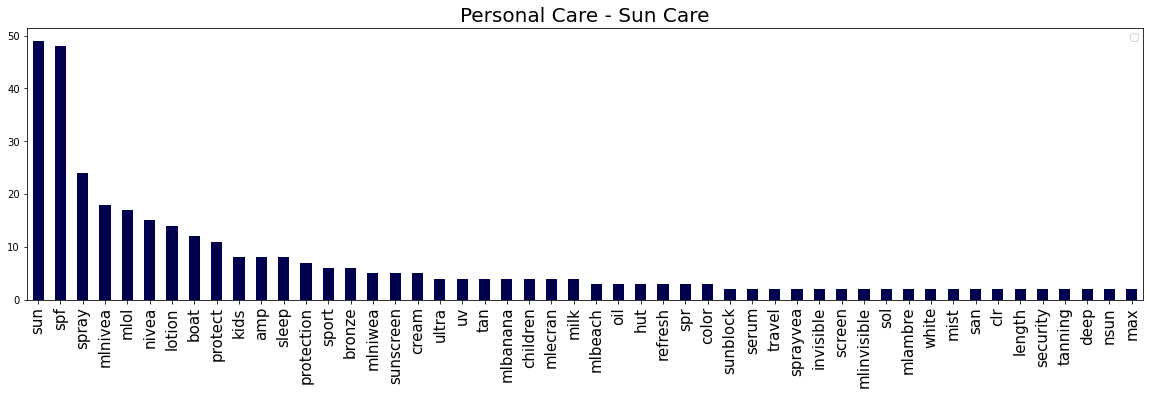

In [153]:
plot_most_common_features(X_cleaner_2,df['Final_Category'])

In [154]:
warnings.filterwarnings('ignore') # Do not print warning messages

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [156]:
def text_p(X):
    return X.apply(lambda x: process_text(x))  

In [157]:
def stemming_func(X):
    return X.apply(lambda x: stemming(x))

In [158]:
count_vect = CountVectorizer(analyzer = "word")
tfidf = TfidfTransformer(norm="l2")

In [159]:
text_process = FunctionTransformer(text_p)
stemming_text = FunctionTransformer(stemming_func)

In [160]:
naive_multi = MultinomialNB()
svc = SVC()
rf = RandomForestClassifier(n_jobs=-1)
lr = LogisticRegression(multi_class='ovr')

In [161]:
pipeline = Pipeline([
    ('process', text_process),
    ('stemmer', stemming_text),
    ('count_vector', count_vect),
    ('tfidf', tfidf),
    ('model', naive_multi)
])
pipeline

Pipeline(steps=[('process',
                 FunctionTransformer(func=<function text_p at 0x00000204CA984F70>)),
                ('stemmer',
                 FunctionTransformer(func=<function stemming_func at 0x00000204CA984AF0>)),
                ('count_vector', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

In [162]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('process',
                 FunctionTransformer(func=<function text_p at 0x00000204CA984F70>)),
                ('stemmer',
                 FunctionTransformer(func=<function stemming_func at 0x00000204CA984AF0>)),
                ('count_vector', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

In [163]:
matthews_corrcoef(y_train, pipeline.predict(X_train))

0.8162231086073909

In [164]:
recall_score(y_train, pipeline.predict(X_train), average='macro')

0.7057600713704102

In [165]:
#GridSearch

In [166]:
Cs = 10**np.linspace(-1,2,3)
gammas = 10**np.linspace(-2,1,5)

In [167]:
param_grid = [
    {'model': [svc], 'model__kernel': ['linear'], 'model__C': Cs, 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]},
    {'model': [svc], 'model__kernel': ['rbf'], 'model__gamma': gammas, 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]},
    {'model': [naive_multi], 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]},
    {'model': [lr], 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]},
    {'model': [rf], 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]}
]

In [168]:
cv = ShuffleSplit(n_splits=5, test_size=0.2)

In [169]:
sklearn.metrics.get_scorer

<function sklearn.metrics._scorer.get_scorer(scoring)>

In [170]:
#%%time
#gs = GridSearchCV(
    #pipeline,
    #param_grid = param_grid,
    #cv = cv,
    #n_jobs=-1
    #scoring='matthews_corrcoef')
#gs.fit(X_train, y_train)

In [171]:
#gs_results = pd.DataFrame(gs.cv_results_).sort_values(['rank_test_score'])
#gs_results.head()

In [172]:
matthews_corrcoef(y_test, pipeline.predict(X_test))

0.7138430553975392

(array([1., 1., 2., 2., 1., 1., 1., 3., 4., 4.]),
 array([0.        , 0.09607843, 0.19215686, 0.28823529, 0.38431373,
        0.48039216, 0.57647059, 0.67254902, 0.76862745, 0.86470588,
        0.96078431]),
 <BarContainer object of 10 artists>)

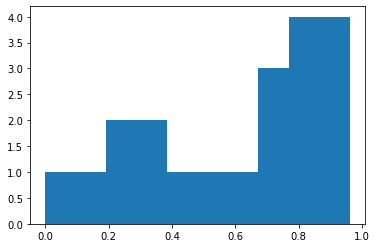

In [173]:
plt.hist(recall_score(y_test, pipeline.predict(X_test), average=None))

(array([0.05, 0.1 , 0.2 , 0.3 , 0.35, 0.4 , 0.45, 0.6 , 0.8 , 1.  ]),
 array([0.        , 0.09607843, 0.19215686, 0.28823529, 0.38431373,
        0.48039216, 0.57647059, 0.67254902, 0.76862745, 0.86470588,
        0.96078431]),
 <BarContainer object of 10 artists>)

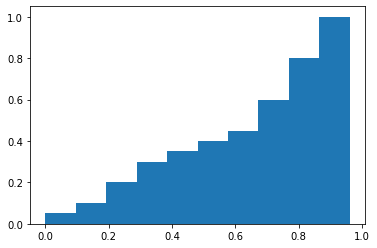

In [174]:
plt.hist(recall_score(y_test, pipeline.predict(X_test), average=None), cumulative=True, density=True)

In [175]:
recall_score(y_test, pipeline.predict(X_test), average='macro')

0.6053816367142769

In [215]:
test_set = pd.read_excel('test_set.xlsx')

In [216]:
final_prediction = pd.DataFrame(X_test.copy())

In [217]:
test_set['Prediction'] = pipeline.predict(test_set['Production Description Test'])

In [218]:
test_set.head(20)

,Production Description Test,Prediction
0,Sta-Soft Refill Baby 500ml,8
1,SUNLIGHT SOAP BABY MILD 175GR,9
2,Baby Bottle 1 Ea,8
3,Bic 3Rasierer6+2FREE(20) 1St,14
4,OL: Gillette Blue 3 Smooth 4+2 Gratis/,18
5,OL: Bic 3 Sensitive Shaver,18
6,Nivea Men Moss Raser 20cl,10
7,SHAVING FOAM 250ML,11
8,SUPER MAX 3 BLADES ONE-DAY SHAVER,14
9,Feather in holeni sens 300ml Tod,18


In [219]:
test_set.replace({'Prediction': code_dictionary}, inplace=True)

In [220]:
test_set.head()

,Production Description Test,Prediction
0,Sta-Soft Refill Baby 500ml,Personal Care - Baby Care
1,SUNLIGHT SOAP BABY MILD 175GR,Personal Care - Body Care
2,Baby Bottle 1 Ea,Personal Care - Baby Care
3,Bic 3Rasierer6+2FREE(20) 1St,Personal Care - Feminine Hygience
4,OL: Gillette Blue 3 Smooth 4+2 Gratis/,Personal Care - Shaving


In [221]:
test_set = test_set.join(test_set['Prediction'].str.split('-', expand=True).rename(columns={0:'IPH Category', 1: 'IPH Sub Category'}))

In [222]:
test_set.head(20)

,Production Description Test,Prediction,IPH Category,IPH Sub Category
0,Sta-Soft Refill Baby 500ml,Personal Care - Baby Care,Personal Care,Baby Care
1,SUNLIGHT SOAP BABY MILD 175GR,Personal Care - Body Care,Personal Care,Body Care
2,Baby Bottle 1 Ea,Personal Care - Baby Care,Personal Care,Baby Care
3,Bic 3Rasierer6+2FREE(20) 1St,Personal Care - Feminine Hygience,Personal Care,Feminine Hygience
4,OL: Gillette Blue 3 Smooth 4+2 Gratis/,Personal Care - Shaving,Personal Care,Shaving
5,OL: Bic 3 Sensitive Shaver,Personal Care - Shaving,Personal Care,Shaving
6,Nivea Men Moss Raser 20cl,Personal Care - Deodorant,Personal Care,Deodorant
7,SHAVING FOAM 250ML,Personal Care - Facial Care and Cosmetics,Personal Care,Facial Care and Cosmetics
8,SUPER MAX 3 BLADES ONE-DAY SHAVER,Personal Care - Feminine Hygience,Personal Care,Feminine Hygience
9,Feather in holeni sens 300ml Tod,Personal Care - Shaving,Personal Care,Shaving


In [223]:
test_set.to_csv('iphpredictions.csv')